This is a test notebook for steps involved in creating an index for desired coins.  This notebook provides the building blocks for the eventual generic module that will preform this task automatically.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt


'C:\\Users\\Mark\\Documents\\DataSci\\Module 5\\Crypto\\Crypto_index_four'

# Importing the Data
In production this will simply call the scrape module

In [ ]:
index_dir = os.getcwd()+'\\Crypto_index_four'
index_dir

In [135]:
df1 = pd.read_csv(index_dir+'\\Aidcoin.csv')
df2 = pd.read_csv(index_dir+'\\decred.csv')
df3 = pd.read_csv(index_dir+'\\ecobit.csv')
df4 = pd.read_csv(index_dir+'\\faircoin.csv')
print(df1.shape, df2.shape, df3.shape, df4.shape)
df_list = [df1,df2,df3,df4]

(617, 7) (1331, 7) (816, 7) (1962, 7)


In [4]:
df1.head()

,Date,Open,High,Low,Close,Volume,Market_Cap
0,Oct 02 2019,0.008789,0.008906,0.008450,0.008582,444,391 753
1,Oct 01 2019,0.008583,0.009212,0.008516,0.008789,278,401 192
2,Sep 30 2019,0.009616,0.009616,0.008347,0.008581,216,391 716
3,Sep 29 2019,0.011106,0.011110,0.008836,0.009617,64,438 985
4,Sep 28 2019,0.010464,0.011370,0.009046,0.011105,282,506 917


# Cleaning the Data

In [32]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market_Cap    0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 7 columns):
Date          617 non-null object
Open          617 non-null float64
High          617 non-null float64
Low           617 non-null float64
Close         617 non-null float64
Volume        617 non-null object
Market_Cap    617 non-null object
dtypes: float64(4), object(3)
memory usage: 33.8+ KB


In [34]:
type(df.Volume[0])

str

In [16]:
for i in range(len(df_list)):
    df_list[i].Volume = df_list[i].Volume.replace('-', str(0))
    df_list[i].Market_Cap = df_list[i].Market_Cap.replace('-', str(0))
    df_list[i].Volume = df_list[i].Volume.apply(lambda x: x.replace(' ', ''))
    df_list[i].Market_Cap = df_list[i].Market_Cap.apply(lambda x: x.replace(' ',''))
    df_list[i].Volume = pd.to_numeric(df_list[i].Volume)
    df_list[i].Market_Cap = pd.to_numeric(df_list[i].Market_Cap)

In [17]:
df_list[0].head()

,Date,Open,High,Low,Close,Volume,Market_Cap
0,Oct 02 2019,0.008789,0.008906,0.008450,0.008582,444,391753
1,Oct 01 2019,0.008583,0.009212,0.008516,0.008789,278,401192
2,Sep 30 2019,0.009616,0.009616,0.008347,0.008581,216,391716
3,Sep 29 2019,0.011106,0.011110,0.008836,0.009617,64,438985
4,Sep 28 2019,0.010464,0.011370,0.009046,0.011105,282,506917


In [18]:
df_list[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 7 columns):
Date          1331 non-null object
Open          1331 non-null float64
High          1331 non-null float64
Low           1331 non-null float64
Close         1331 non-null float64
Volume        1331 non-null int64
Market_Cap    1331 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 72.9+ KB


In [23]:
currency = ['AidCoin', 'Decred', 'Ecobit', 'Faircoin']
for i in range(len(df_list)):
    print(currency[i])
    print(df_list[i].describe())
    print('#'*50)

AidCoin
             Open        High         Low       Close        Volume  \
count  617.000000  617.000000  617.000000  617.000000  6.170000e+02   
mean     0.091198    0.097434    0.084274    0.089999  2.230643e+05   
std      0.103489    0.110784    0.092051    0.100109  6.622979e+05   
min      0.008054    0.008653    0.007716    0.008055  6.400000e+01   
25%      0.028068    0.032133    0.024653    0.027383  1.531600e+04   
50%      0.054734    0.057522    0.051587    0.054637  4.850000e+04   
75%      0.116250    0.121042    0.110423    0.116268  1.916540e+05   
max      0.808118    0.827591    0.670572    0.803381  1.081590e+07   

         Market_Cap  
count  6.170000e+02  
mean   2.837725e+06  
std    2.307381e+06  
min    0.000000e+00  
25%    1.041639e+06  
50%    2.310775e+06  
75%    4.193674e+06  
max    1.119565e+07  
##################################################
Decred
              Open         High          Low        Close        Volume  \
count  1331.000000  1

In [25]:
for i in range(len(df_list)):
    print(df_list[i].isna().sum())

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market_Cap    0
dtype: int64
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market_Cap    0
dtype: int64
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market_Cap    0
dtype: int64
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market_Cap    0
dtype: int64


# Merging and Processing Currencies

In [51]:
joined_df = pd.merge(df_list[3], df_list[2], on='Date', how='left')
joined_df =pd.merge(joined_df, df_list[1], on='Date', how='left')
joined_df =pd.merge(joined_df, df_list[0], on='Date', how='left')
joined_df.columns = ['Date', # 0 : 1-6 : 7-12 : 13-18 : 19-24 
                    f'{currency[0]}_Open', f'{currency[0]}_High', f'{currency[0]}_Low', f'{currency[0]}_Close', f'{currency[0]}_Volume', f'{currency[0]}_Market_Cap',
                    f'{currency[1]}_Open', f'{currency[1]}_High', f'{currency[1]}_Low', f'{currency[1]}_Close', f'{currency[1]}_Volume', f'{currency[1]}_Market_Cap',
                    f'{currency[2]}_Open', f'{currency[2]}_High', f'{currency[2]}_Low', f'{currency[2]}_Close', f'{currency[2]}_Volume', f'{currency[2]}_Market_Cap',
                    f'{currency[3]}_Open', f'{currency[3]}_High', f'{currency[3]}_Low', f'{currency[3]}_Close', f'{currency[3]}_Volume', f'{currency[3]}_Market_Cap',]
(joined_df.columns)

Index(['Date', 'AidCoin_Open', 'AidCoin_High', 'AidCoin_Low', 'AidCoin_Close',
       'AidCoin_Volume', 'AidCoin_Market_Cap', 'Decred_Open', 'Decred_High',
       'Decred_Low', 'Decred_Close', 'Decred_Volume', 'Decred_Market_Cap',
       'Ecobit_Open', 'Ecobit_High', 'Ecobit_Low', 'Ecobit_Close',
       'Ecobit_Volume', 'Ecobit_Market_Cap', 'Faircoin_Open', 'Faircoin_High',
       'Faircoin_Low', 'Faircoin_Close', 'Faircoin_Volume',
       'Faircoin_Market_Cap'],
      dtype='object')

In [73]:
# Please check calculations.  weighted columns might need to be shifted one row.  My understanding of the calculation foggy...

In [81]:
weighted_Open=[]
for i in range(len(joined_df)):
    a=((joined_df.iloc[i,1])*(joined_df.iloc[i,6])+(joined_df.iloc[i,7])*(joined_df.iloc[i,12])+(joined_df.iloc[i,13])*(joined_df.iloc[i,18])\
    +(joined_df.iloc[i,19])*(joined_df.iloc[i,24]))/(joined_df.iloc[i,6]+joined_df.iloc[i,12]+joined_df.iloc[i,18]+joined_df.iloc[i,24])
    weighted_Open.append(a)

In [82]:
joined_df['Weighted_Open'] = weighted_Open
joined_df.columns

Index(['Date', 'AidCoin_Open', 'AidCoin_High', 'AidCoin_Low', 'AidCoin_Close',
       'AidCoin_Volume', 'AidCoin_Market_Cap', 'Decred_Open', 'Decred_High',
       'Decred_Low', 'Decred_Close', 'Decred_Volume', 'Decred_Market_Cap',
       'Ecobit_Open', 'Ecobit_High', 'Ecobit_Low', 'Ecobit_Close',
       'Ecobit_Volume', 'Ecobit_Market_Cap', 'Faircoin_Open', 'Faircoin_High',
       'Faircoin_Low', 'Faircoin_Close', 'Faircoin_Volume',
       'Faircoin_Market_Cap', 'Weighted_Open', 'Weighted_Close',
       'Weighted_High'],
      dtype='object')

In [83]:
weighted_Close=[]
for i in range(len(joined_df)):
    a=((joined_df.iloc[i,4])*(joined_df.iloc[i,6])+(joined_df.iloc[i,10])*(joined_df.iloc[i,12])+(joined_df.iloc[i,16])*(joined_df.iloc[i,18])\
    +(joined_df.iloc[i,22])*(joined_df.iloc[i,24]))/(joined_df.iloc[i,6]+joined_df.iloc[i,12]+joined_df.iloc[i,18]+joined_df.iloc[i,24])
    weighted_Close.append(a)
joined_df['Weighted_Close'] = weighted_Close

In [84]:
weighted_Low=[]
for i in range(len(joined_df)):
    a=((joined_df.iloc[i,3])*(joined_df.iloc[i,6])+(joined_df.iloc[i,9])*(joined_df.iloc[i,12])+(joined_df.iloc[i,15])*(joined_df.iloc[i,18])\
    +(joined_df.iloc[i,21])*(joined_df.iloc[i,24]))/(joined_df.iloc[i,6]+joined_df.iloc[i,12]+joined_df.iloc[i,18]+joined_df.iloc[i,24])
    weighted_Low.append(a)
joined_df['Weighted_Low'] = weighted_Low

In [85]:
weighted_High=[]
for i in range(len(joined_df)):
    a=((joined_df.iloc[i,2])*(joined_df.iloc[i,6])+(joined_df.iloc[i,8])*(joined_df.iloc[i,12])+(joined_df.iloc[i,14])*(joined_df.iloc[i,18])\
    +(joined_df.iloc[i,20])*(joined_df.iloc[i,24]))/(joined_df.iloc[i,6]+joined_df.iloc[i,12]+joined_df.iloc[i,18]+joined_df.iloc[i,24])
    weighted_High.append(a)
joined_df['Weighted_High'] = weighted_High

In [94]:
final_df = joined_df.set_index(['Date'])

In [159]:
final_df.columns

Index(['AidCoin_Open', 'AidCoin_High', 'AidCoin_Low', 'AidCoin_Close',
       'AidCoin_Volume', 'AidCoin_Market_Cap', 'Decred_Open', 'Decred_High',
       'Decred_Low', 'Decred_Close', 'Decred_Volume', 'Decred_Market_Cap',
       'Ecobit_Open', 'Ecobit_High', 'Ecobit_Low', 'Ecobit_Close',
       'Ecobit_Volume', 'Ecobit_Market_Cap', 'Faircoin_Open', 'Faircoin_High',
       'Faircoin_Low', 'Faircoin_Close', 'Faircoin_Volume',
       'Faircoin_Market_Cap', 'Weighted_Open', 'Weighted_Close',
       'Weighted_High', 'Weighted_Low'],
      dtype='object')

In [145]:
final_df.describe()

,AidCoin_Open,AidCoin_High,AidCoin_Low,AidCoin_Close,AidCoin_Volume,AidCoin_Market_Cap,Decred_Open,Decred_High,Decred_Low,Decred_Close,...,Faircoin_Open,Faircoin_High,Faircoin_Low,Faircoin_Close,Faircoin_Volume,Faircoin_Market_Cap,Weighted_Open,Weighted_Close,Weighted_High,Weighted_Low
count,613.000000,613.000000,613.000000,613.000000,613.000000,6.130000e+02,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,6.130000e+02,6.130000e+02,613.000000,613.000000,613.000000,613.000000
mean,0.208217,0.226124,0.187101,0.206747,4972.264274,1.099764e+07,0.013778,0.015175,0.012765,0.013730,...,0.091265,0.097530,0.084322,0.090065,2.234883e+05,2.834791e+06,39.627671,39.537699,41.310220,37.873207
std,0.173109,0.186759,0.155631,0.171286,15357.206514,9.111341e+06,0.006876,0.008609,0.006131,0.006854,...,0.103803,0.111121,0.092331,0.100414,6.641651e+05,2.313408e+06,23.655954,23.642328,25.111820,22.318283
min,0.016271,0.016693,0.004554,0.008388,0.000000,4.461660e+05,0.003162,0.003186,0.002631,0.003162,...,0.008054,0.008653,0.007716,0.008055,6.400000e+01,0.000000e+00,13.575357,13.554918,13.965681,13.256431
25%,0.067401,0.073694,0.062046,0.066960,39.000000,3.561873e+06,0.008739,0.008840,0.008141,0.008744,...,0.027464,0.031945,0.024612,0.027165,1.531600e+04,1.037741e+06,22.515670,22.450269,23.008380,21.715803
50%,0.123771,0.133577,0.116666,0.123276,422.000000,6.557523e+06,0.013150,0.014005,0.012290,0.012969,...,0.054698,0.057511,0.051578,0.054596,4.862100e+04,2.309185e+06,30.836494,30.689247,32.071897,29.192398
75%,0.332119,0.363050,0.274438,0.331296,2301.000000,1.762290e+07,0.016971,0.018767,0.015777,0.016923,...,0.116413,0.121233,0.110559,0.116309,1.916540e+05,4.193674e+06,54.168089,54.117815,56.161352,52.032125
max,0.832744,0.857181,0.799262,0.819353,172951.000000,4.358452e+07,0.042945,0.071647,0.033828,0.043110,...,0.808118,0.827591,0.670572,0.803381,1.081590e+07,1.119565e+07,111.341935,111.705112,130.879427,103.631976


In [153]:
# as-is the final index is only as long as the shortest running currency
final_df = final_df.dropna()
final_df = final_df[::-1]

# Display various Index Measures for Evaluation

Text(0.5, 1.0, 'Raw Data')

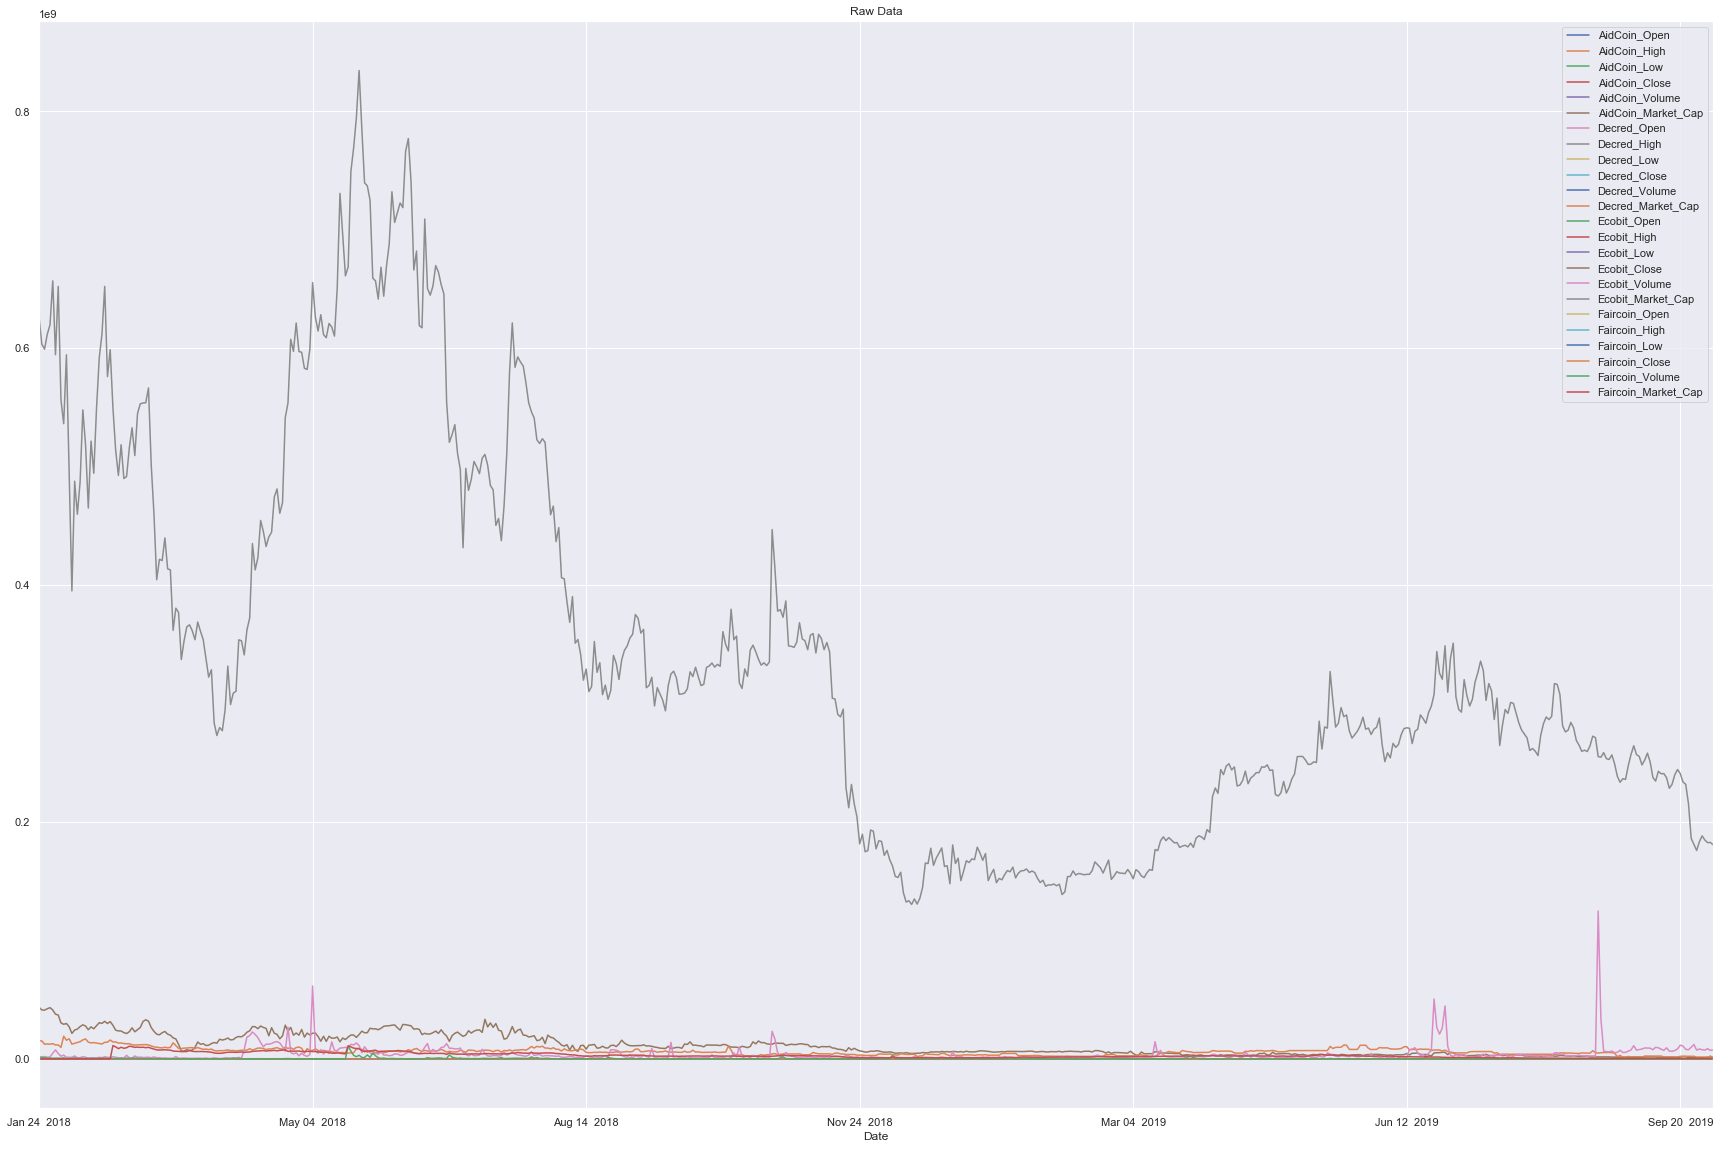

In [161]:
final_df.loc[:, :'Faircoin_Market_Cap'].plot(figsize=(30,20))
plt.title('Raw Data')

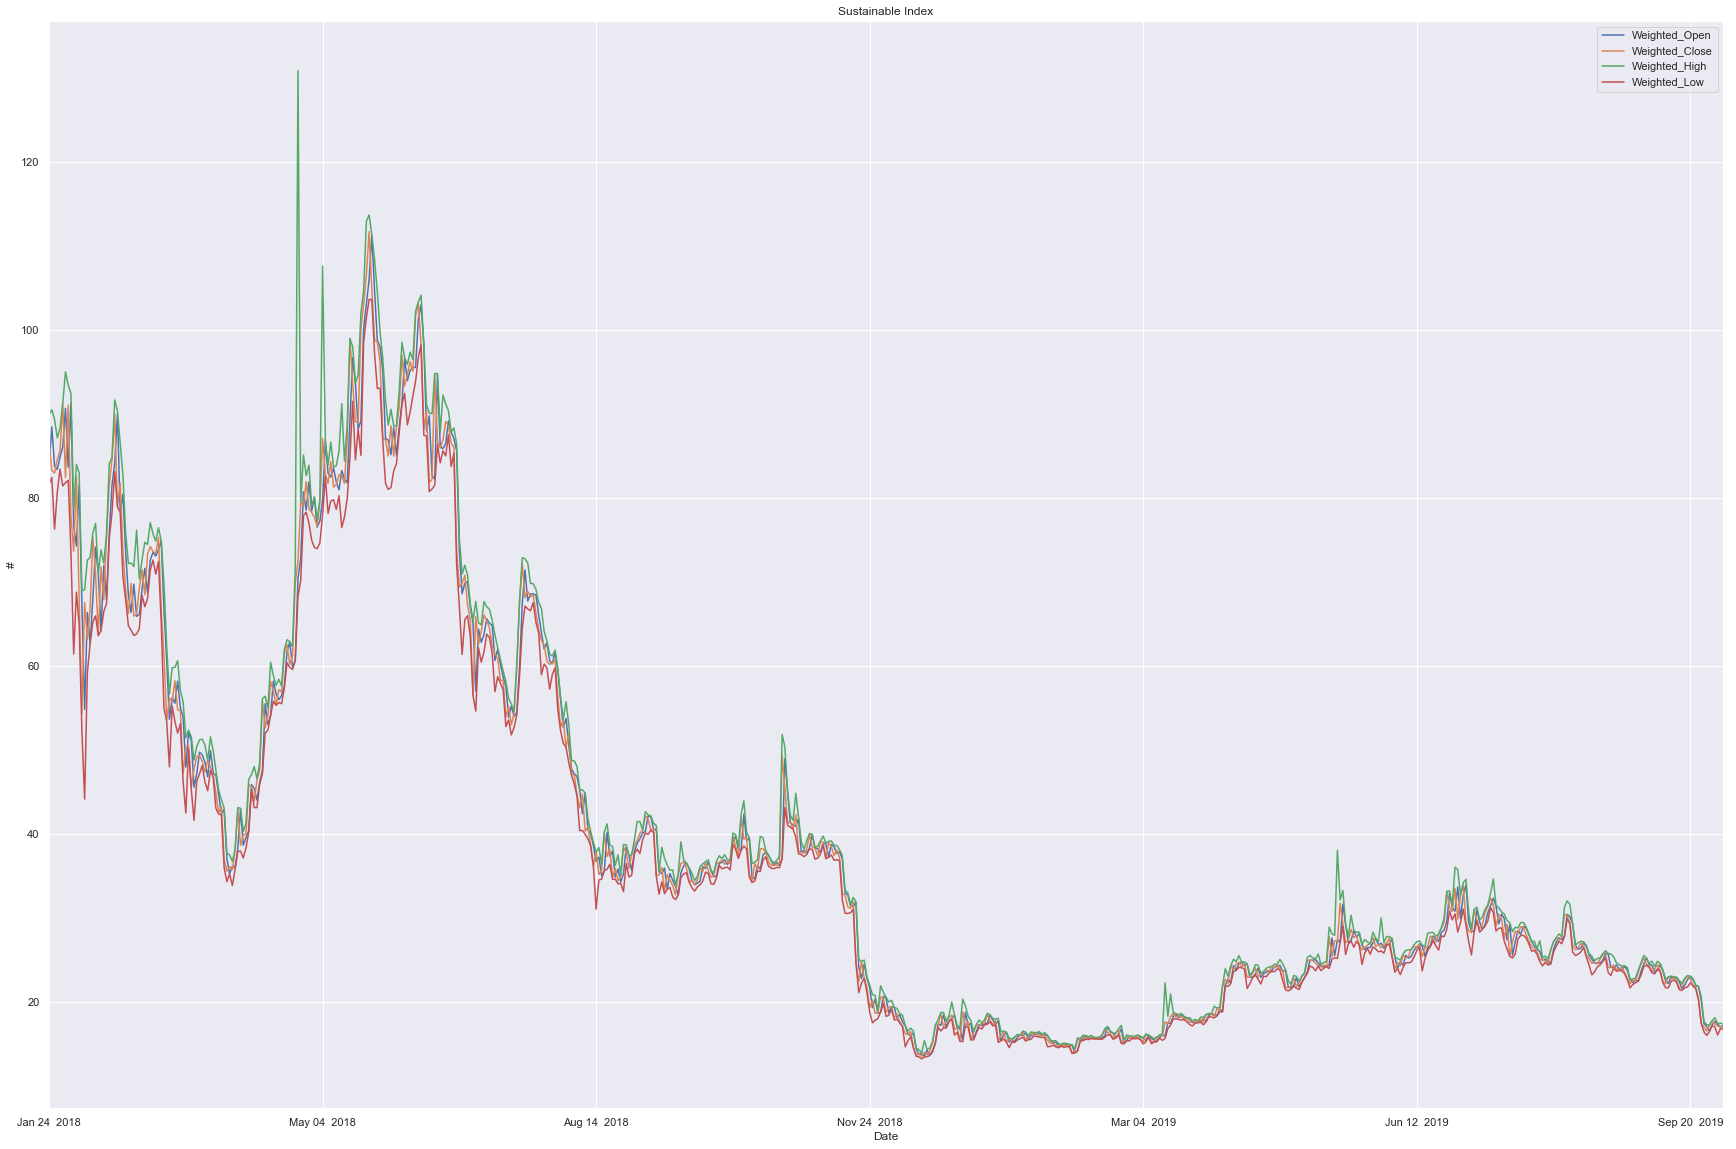

In [157]:
feat = final_df.loc[:, 'Weighted_Open':'Weighted_Low']
feat.plot(figsize=(30,20));
plt.title('Sustainable Index')
plt.ylabel('#')
plt.savefig('weighted_no_memory.png')

In [160]:
open_cols = [col for col in final_df.columns if 'Open' in col]
opens = final_df[open_cols]
high_cols = [col for col in final_df.columns if 'High' in col]
highs = final_df[high_cols]
low_cols = [col for col in final_df.columns if 'Low' in col]
lows = final_df[low_cols]
close_cols = [col for col in final_df.columns if 'Close' in col]
closes = final_df[close_cols]

In [162]:
opens['Average'] = opens.mean(axis=1)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
opens.head()

,AidCoin_Open,Decred_Open,Ecobit_Open,Faircoin_Open,Weighted_Open,Average
Date,,,,,,
Jan 24 2018,0.809443,0.033615,91.79,0.730442,83.979374,35.468575
Jan 25 2018,0.832744,0.034505,96.70,0.808118,88.468856,37.368845
Jan 26 2018,0.774731,0.034199,91.25,0.644342,83.816126,35.303880
Jan 27 2018,0.773636,0.025812,90.83,0.573812,83.401695,35.120991
Jan 28 2018,0.799262,0.028558,92.44,0.623214,84.874604,35.753128


In [164]:
highs['Average'] = highs.mean(axis=1)
lows['Average'] = lows.mean(axis=1)
closes['Average'] = closes.mean(axis=1)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [169]:
#halflife is set to 1 day
opens['exp_rolmean'] = opens['Average'].ewm(halflife=1).mean()

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


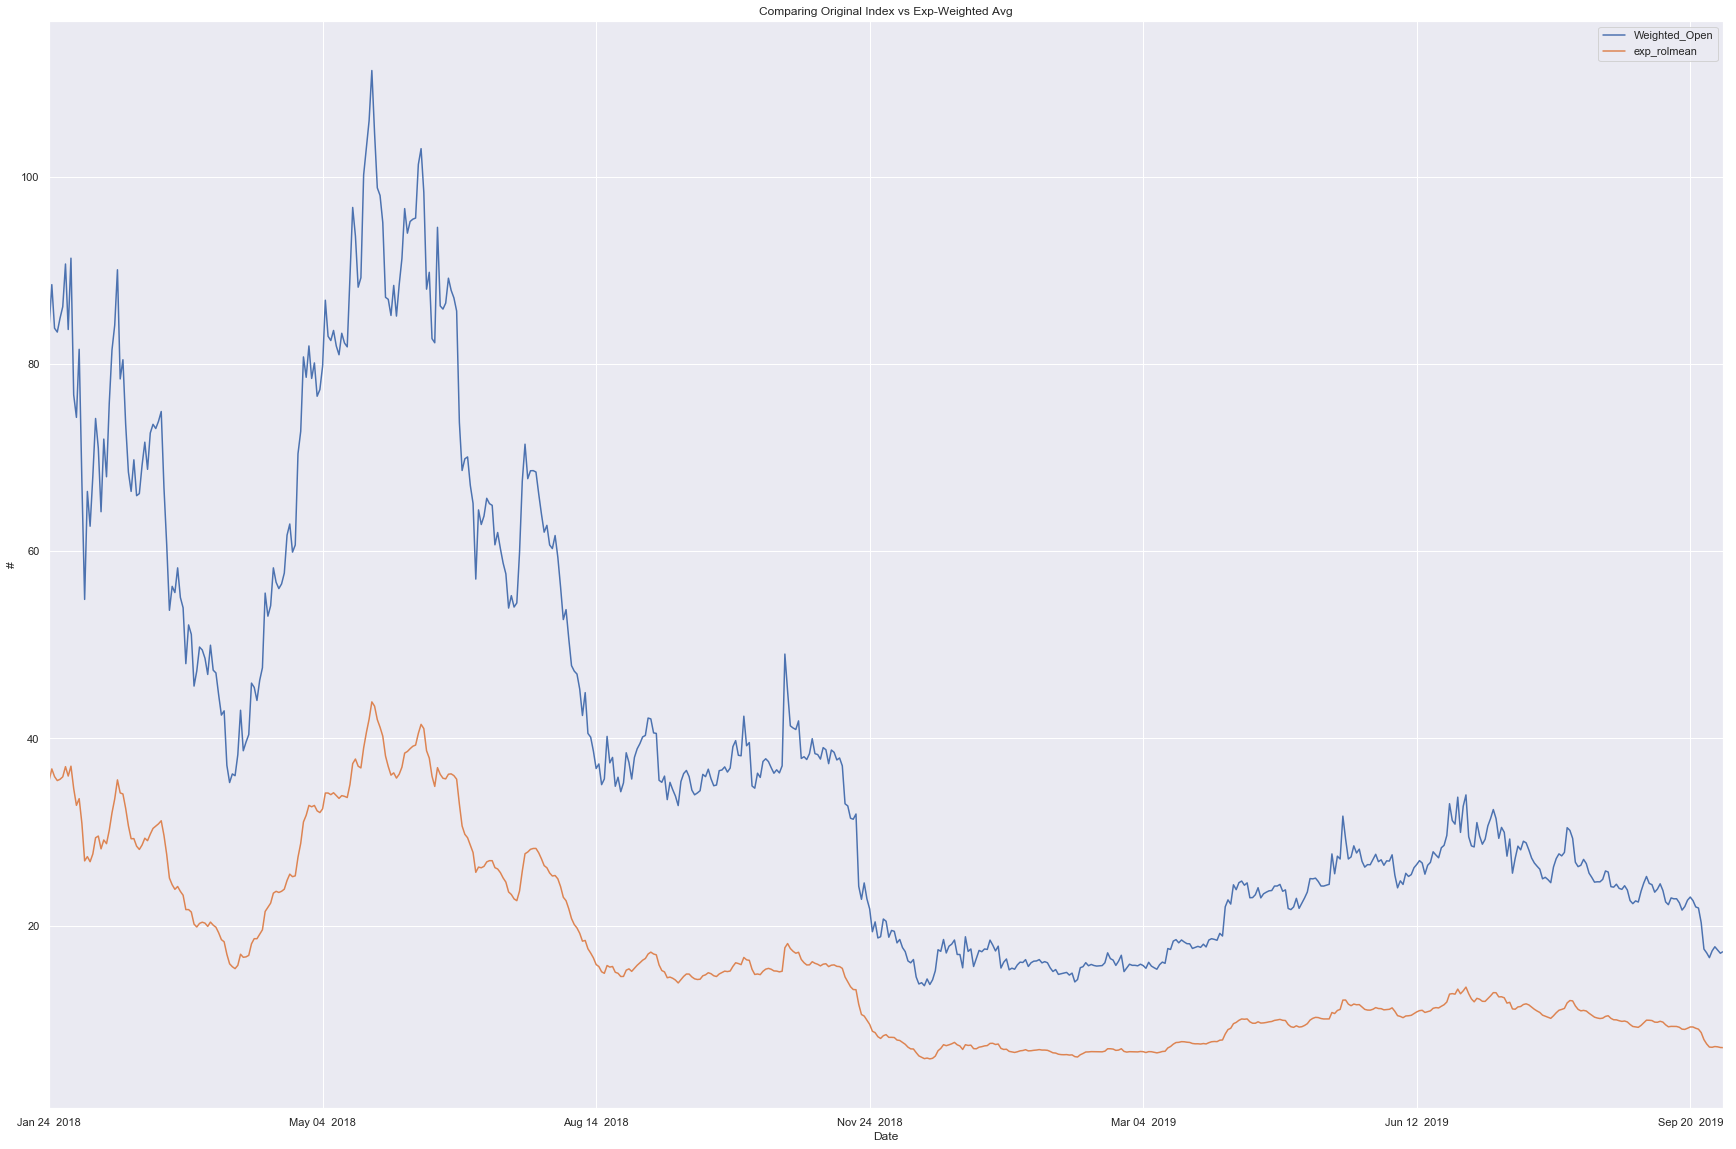

<Figure size 432x288 with 0 Axes>

In [173]:
# It should be noted that this weighted average takes the previously summed weight (which it compares against) in as a feature

opens[['Weighted_Open', 'exp_rolmean']].plot(figsize=(30,20))
plt.title('Comparing Original Index vs Exp-Weighted Avg')
plt.ylabel('#')
plt.show();
plt.savefig('Comparing_Summed_vs_exp_weighted_mean.png')

In [174]:
from fbprophet import Prophet as proph

In [207]:
Model = proph(interval_width=0.95)
ds = pd.DataFrame()
ds['y'] = opens['exp_rolmean']
ds['ds'] = opens.index

ds['ds'] = pd.to_datetime(ds['ds'])

In [208]:
ds.head()

,y,ds
Date,,
Jan 24 2018,35.468575,2018-01-24
Jan 25 2018,36.735421,2018-01-25
Jan 26 2018,35.917397,2018-01-26
Jan 27 2018,35.492647,2018-01-27
Jan 28 2018,35.627089,2018-01-28


In [209]:
Model.fit(ds)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [215]:
#Predict one month in the future
future_dates = Model.make_future_dataframe(periods=30, include_history = True)
future_dates.tail()

,ds
638,2019-10-28
639,2019-10-29
640,2019-10-30
641,2019-10-31
642,2019-11-01


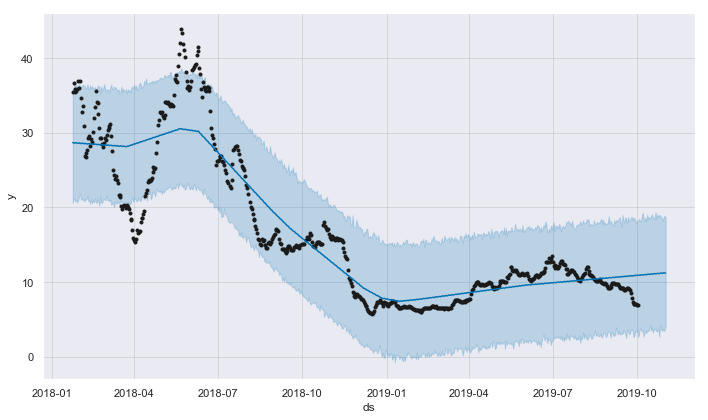

In [216]:
forecast = Model.predict(future_dates)
Model.plot(forecast, uncertainty=True)
plt.ylabel('#')
plt.xlabel('date')
plt.title('Predicting Index Performance - Data')
plt.show();